In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

Ch 11 Objective
* Missing Values 
* Outlier
* Error


### 데이터 결측값(missing values) 확인
* .info() : total entries와 column내 entries가 다르다면 해당 column에 결측값이 있음을 보여줍니다.
<br> 

* .isna() : sum()과 함께 사용하면 column에 결측값이 얼마나 있는지 알 수 있습니다.

In [3]:
air_df = pd.read_csv('data/ch11/Airdata.csv')

air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [4]:
for col in air_df.columns :
    n_mv = sum(air_df[col].isna())
    print('{} : {}'.format(col,n_mv))

DateTime : 0
Temperature : 0
Humidity : 0
Wind_Speed : 0
Wind_Direction : 0
NO2_Location_A : 120
NO2_Location_B : 580
NO2_Location_C : 132


### Types of Missing Values
* MCAR(Missing completely at random) : 결측값이 우연에 의해 발생되는 경우를 말합니다. 불안정한 인터넷 상태로 원래 전송되어야 할 자료가 들어오지 않는 경우가 해당됩니다.
<br>

* MAR(Missing at random) : 결측값이 알지못하는 어떤 오류로 인해서 발생되는 경우입니다. 기계가 노후화 되면서 측정할 수 있는 범위가 점점 감소하다보니 원래라면 들어오는 값이 들어오지 않는 경우가 있습니다.
<br>

* MNAR(Missing not at random) : 결측값이 어떤 의도에 의해서 발생되는 경우입니다. 데이터가 노출되면 발생할 손해가 예상돼 의도적으로 공개하지 않는 경우가 있습니다.

In [5]:
val = []
for boolean in [True, False] :
    BM = air_df['NO2_Location_A'].isna() == boolean
    air_df_bool = air_df[BM]['Temperature']
    val.append(air_df_bool)

print(len(val))

2


### Missing value와 not missing Value가 차이가 없으므로 의도되지 않았음을 알 수 있다.

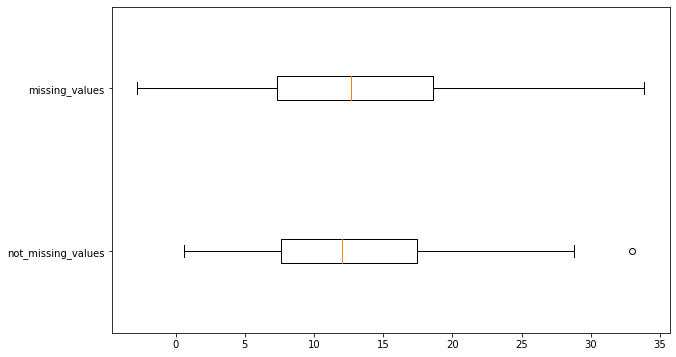

In [6]:
plt.figure(figsize=(10,6))
plt.boxplot(val, vert=False)
plt.yticks([1,2], ['not_missing_values','missing_values'])
plt.show()

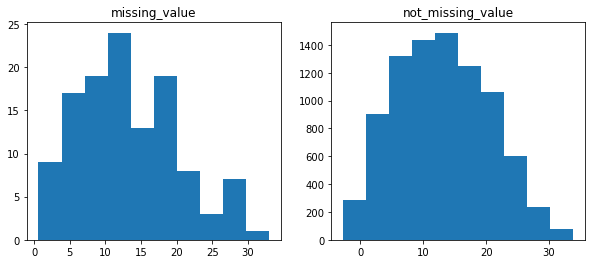

In [7]:
plt.figure(figsize=(10,4))
name = ['missing_value','not_missing_value']
for i, dat in enumerate(val) :
    plt.subplot(1,2,i+1)
    plt.hist(dat)
    plt.title(name[i])
plt.show()

### two-sample t-test (통계적 방법)
 numerical attributes인 두 그룹 간 값 차이가 얼마나 있는지 확인하는 방법입니다.

### ??
* T-test가 뭐지? 두 그룹이 관련성 없다는 가정을 한 뒤 이 가정이 맞는지 확인하는 과정.
* 
* P-value가 낮으면 두 대상이 관련성 높다는 의미인가? P-value가 높으면 두 대상이 관련성 없다는 건가?

In [8]:
from scipy.stats import ttest_ind
BM = air_df['NO2_Location_A'].isna()
ttest_ind(air_df[BM].Temperature, air_df[~BM].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

In [9]:
air_df.DateTime = pd.to_datetime(air_df.DateTime, format='%m/%d/%Y %H:%M')

### series 전체에 datetime을 적용하고 싶으면 dt를 활용하자.

In [10]:
air_df['hour'] = air_df.DateTime.dt.hour
air_df['day'] = air_df.DateTime.dt.day
air_df['month'] = air_df.DateTime.dt.month
air_df['weekday'] = air_df.DateTime.dt.day_name()

In [11]:
air_df.drop(columns=['time','test_year'], inplace =True)

KeyError: "['time' 'test_year'] not found in axis"

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,day,month,year,weekday,hour
0,2020-01-01,2.180529,87,1.484318,75.96376,39.23,52.88,62.37,1,1,2020,Wednesday,0


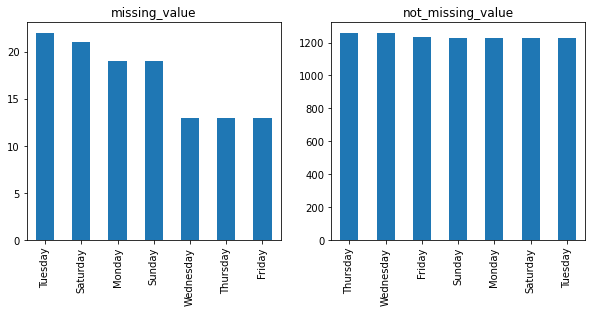

In [ ]:
## Categorical value 비교는 bar plot
plt.figure(figsize=(10,4))
for i, poss in enumerate([True, False]) : 
    BM = air_df['NO2_Location_A'].isna() == poss
    plt.subplot(1,2,i+1)
    sorted_air_df = air_df[BM]['weekday'].value_counts().plot.bar()
    plt.xticks(rotation=90)
    if poss == True :
        plt.title('missing_value')
    else :
        plt.title('not_missing_value')



In [ ]:
from scipy.stats import chi2_contingency
BM = air_df['NO2_Location_A'].isna()
contingency_table = pd.crosstab(BM,air_df.weekday)
chi2_contingency(contingency_table)

(6.048964133655503,
 0.41772751510388023,
 6,
 array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
         1254.62295082, 1230.95081967, 1254.62295082],
        [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
           17.37704918,   17.04918033,   17.37704918]]))

<AxesSubplot:xlabel='hour'>

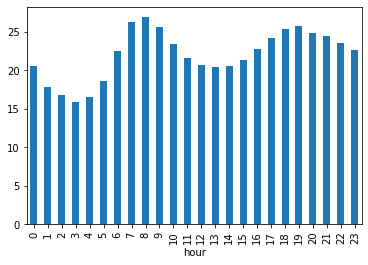

In [ ]:
air_df.groupby('hour')['NO2_Location_A'].mean().plot.bar()

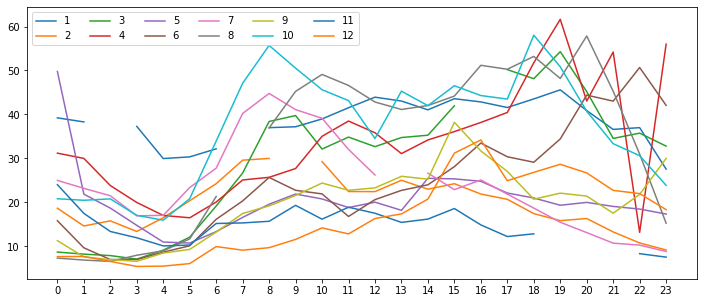

In [ ]:
plt.figure(figsize=(12,5))
BM = air_df.day == 1
a = air_df[BM].groupby(['month','hour'])['NO2_Location_A'].mean()
# index = range(0,24)
for val in air_df.month.unique() : 
    plt.plot(a[val], label = val)
plt.xticks(range(0,24))
plt.legend(ncol=6)
plt.show()    


### Interpolate 적용하기

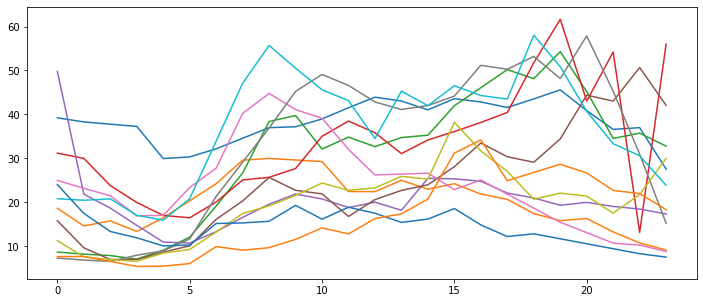

In [ ]:
abc = air_df.NO2_Location_A.interpolate(method='linear')
month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()

plt.figure(figsize=(12,5))
BM = air_df.day == 1

for mn in month_poss :
    BM = (air_df.month == mn)  & (air_df.day == 1)
    plt.plot(abc[BM].values,label=mn)



In [ ]:
kidney_disease_df = pd.read_csv('data/ch11/kidney_disease.csv')

for attr in kidney_disease_df.columns :
    MV = sum(kidney_disease_df[attr].isna())
    print('{}_{}_{}'.format(attr,MV, MV/len(kidney_disease_df[attr])))

rc_131_0.3275
sc_17_0.0425
pcv_71_0.1775
sg_47_0.1175
hemo_52_0.13
diagnosis_0_0.0


When the number of missing values are across different attributes and are high(more than 15%), 

it might be the case that most of the missing values happen for the same data objectes, 

and that could be very problematic for our analysis

### Missing value 시각화

<AxesSubplot:>

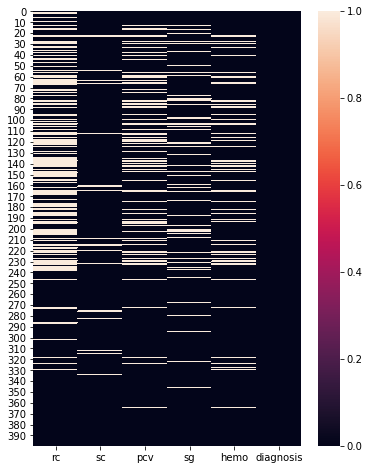

In [ ]:
plt.figure(figsize=(6,8))
sns.heatmap(kidney_disease_df.isna())

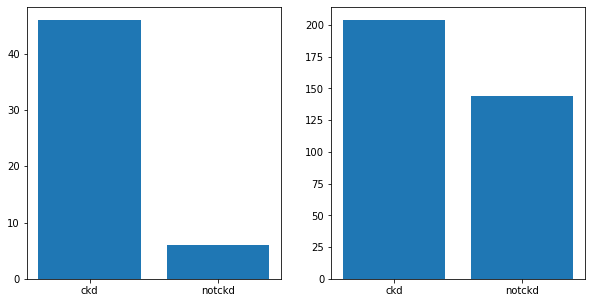

In [ ]:
# False True 분류
plt.figure(figsize=(10,5))
for i, poss in enumerate([True,False]) : 
    BM = kidney_disease_df. .isna() == poss
    plt.subplot(1,2,i+1)
    plt.bar(kidney_disease_df.diagnosis.unique(),kidney_disease_df[BM].diagnosis.value_counts())
plt.show()
# for i, poss in enumerate([True,False]) : 
#     BM = kidney_disease_df.rc.isna() == poss    
#     plt.subplot(1,2,i+1)
#     plt.hist(kidney_disease_df[BM].diagnosis.value_counts())
# plt.show()

### Outlier

In [14]:
responses_df = pd.read_csv('data/ch11/responses.csv')

<AxesSubplot:xlabel='Weight', ylabel='Height'>

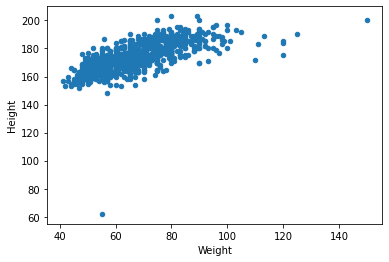

In [15]:
responses_df.plot.scatter(x='Weight', y='Height')

<AxesSubplot:xlabel='God', ylabel='Education'>

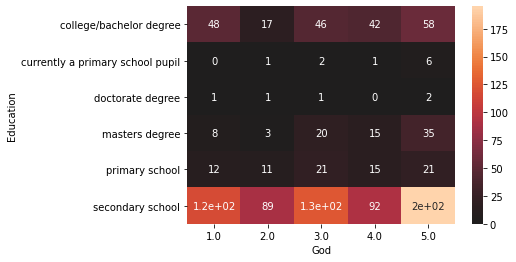

In [20]:
cont_tab = pd.crosstab(responses_df.Education,responses_df.God)
sns.heatmap(cont_tab,annot=True,center=0.5)

<AxesSubplot:xlabel='Age', ylabel='Education'>

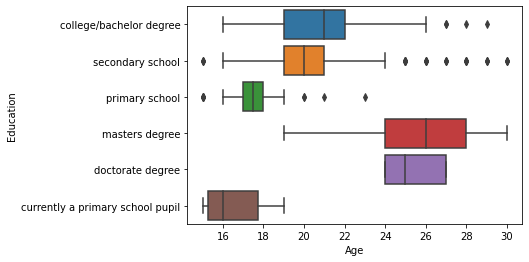

In [34]:
sns.boxplot(x=responses_df.Age,y=responses_df.Education)

### boxplot은 결측값이 있으면 그려지지 않는다.

* 그럴 땐 dropna()를 사용하자!

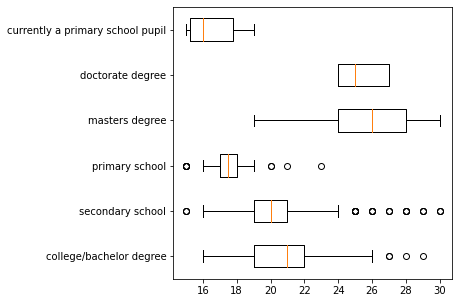

In [58]:
# education 하나씩 sorting 한 다음 age boxplot을 그리면 된다.
edu = responses_df.Education.dropna().unique()
result_edu = []
for name in edu :
    BM = responses_df.Education == name
    edu_sort = responses_df[BM].Age.dropna()
    result_edu.append(edu_sort)

# print(result_edu)
plt.figure(figsize=(5,5))
result_edu_se = pd.Series(result_edu, index=edu)
# result_edu_se[3]
plt.boxplot(result_edu_se,vert=False)
plt.yticks(list(range(1,len(edu)+1)),edu)

plt.show()

In [67]:
dimensions = ['Country', 'Metal or Hardrock', 'Folk', 'Musical']
xs = responses_df[dimensions]

In [68]:
xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


### Dealing with outliers
* Do nothing
* Replace with the upper cap or lower cap
* Perform a log transforamtion
* Remove data objects with outliers

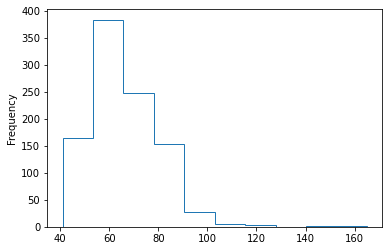

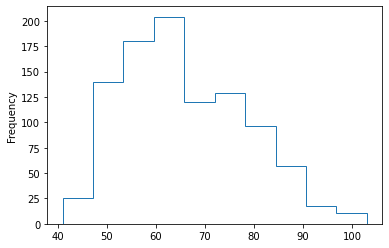

In [70]:
responses_df.Weight.plot.hist(histtype='step')
plt.show()
BM = responses_df.Weight<105
responses_df.Weight[BM].plot.hist(histtype='step')
plt.show()